<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/Multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install the 0.24 version of scikit-learn
!pip uninstall scikit-learn -y

!pip install -U scikit-learn


Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 1.4MB/s 


In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.linear_model as linear_module

In [ ]:
#@title Read the data as CSV file.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

df = pd.read_csv(url, header=None, sep='\s+')

In [ ]:
 #@title Clean up.
 df.columns = ["mpg", "cylinders", "displacement", "horsepower", 
                   "weight", "acceleration", "year", "origin", "name"]
 df.horsepower = pd.to_numeric(df['horsepower'],errors='coerce')
 df = df.dropna()
 

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Two variable regression

In [ ]:
Y = df[['mpg']]
X = df[['cylinders', 'horsepower']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [41.99863077]
slope [[-1.67720319 -0.09341019]]


Calculate training error.  A very high r2 score or a low mean squared error indicates overfit to training data.

In [ ]:
# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)


0.6489048239448725

Calculate the test error. A low r2 score indicates a not-so-good model.

In [ ]:

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.664572220012015

# Preprocessing inputs

Suppose we pick `cylinders`, which ranges from 4-8 and `weight` which is in the 1000s as our predictors.

In [ ]:
Y = df[['mpg']]
X = df[['cylinders', 'weight']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [45.22774304]
slope [[-0.60265114 -0.00629629]]


## Standardization

The weights differ by a factor of a 100, -0.6 and -0.006. It will be hard to know the relative importance of the variables from these weights alone.

So we will standardize the model.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

scaler


StandardScaler()

In [ ]:
print(scaler.mean_, scaler.scale_)


[   5.47193878 2977.58418367] [  1.70360611 848.31844657]


See the difference between `X_train` and `X_train_scaled`. The cylinder values are scaled using the mean and standard deviation.

In [ ]:
X_train[0:5]

,cylinders,weight
259,6,3070.0
289,8,4360.0
108,4,2279.0
206,4,2565.0
99,6,2945.0


In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled[0:5]

array([[ 0.30996673,  0.10894001],
       [ 1.48394702,  1.62959537],
       [-0.86401356, -0.82349286],
       [-0.86401356, -0.48635531],
       [ 0.30996673, -0.03841032]])

Next we will train using the scaled variables. Now we have the slopes in the same order of magnitude.

In [ ]:
# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train_scaled, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [23.18234238]
slope [[-1.02668016 -5.3412581 ]]


Do not forget to scale the test dataset too!

In [ ]:
# test error
X_test_scaled = scaler.transform(X_test)

y_predict = reg.predict(X_test_scaled)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.7333980039099433

After scaling the `r2` score improved from 0.69 to 0.73.

## Min-max scaling

Instead of using mean and variance like `StandardScaler` above, we will use min-max scaling.  min-max scaling will make the min value 0 and max value 1.  All other values will be between 0 and 1.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax[0:5]

array([[0.6       , 0.41309895],
       [1.        , 0.77884888],
       [0.2       , 0.18882903],
       [0.2       , 0.26991778],
       [0.6       , 0.37765807]])

In [ ]:
X_train[0:5]

,cylinders,weight
259,6,3070.0
289,8,4360.0
108,4,2279.0
206,4,2565.0
99,6,2945.0


## Exercise

Use min-max scaling to see if it improves the r2 score.

## Exercise

Use min-max scaling for all the variables and see if it improves.

## Categorical variables: One-Hot encoding

What should we do with categorical variables, like car model names?



In [ ]:
# Let us extract the model names first
df.name.str.split().str[0].unique()


NameError: ignored

Notice that there is some duplication. `'chevrolet', 'chevroelt', 'chevy'` are the same make. Similarly, `'volkswagen', 'vw', 'vokswagen'` are the same car.  After this clean up, we can use one-hot encoding.


In [ ]:
df = df.assign(model_name =  df.name.str.split().str[0])
df.model_name.head()

In [ ]:
df.model_name.unique()

In [ ]:
df.model_name = df.model_name.str.replace('chevroelt', 'chevrolet')
df.model_name = df.model_name.str.replace('chevy','chevrolet')
df.model_name = df.model_name.str.replace('toyouta','toyota')
df.model_name = df.model_name.str.replace('mercedes-benz','mercedes')
df.model_name = df.model_name.str.replace('vw','volkswagen')
df.model_name = df.model_name.str.replace('vokswagen','volkswagen')
df.model_name = df.model_name.str.replace('maxda','mazda')

In [ ]:
df.model_name.unique()

In [ ]:
model=list(df.model_name.unique())
model

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
enc = preprocessing.OneHotEncoder(categories=[model])
enc

We will get a 392x30 boolean matrix after encoding.  There will be very few ones in this matrix, so it is stored in the Compressed Sparse Row Format.

In [ ]:
x = [['bmw'], ['saab']]
enc.fit(x)
enc.transform(df.model_name.values.reshape(-1,1))



In [ ]:

pd.DataFrame.sparse.from_spmatrix(enc.transform(df.model_name.values.reshape(-1,1)))

In [ ]:
X_enc = enc.transform(df.model_name.values.reshape(-1,1))

X_enc_train, X_enc_test, y_train, y_test = train_test_split(X_enc, Y, test_size=0.25, random_state=1)

# training
model = linear_module.LinearRegression()
reg = model.fit(X_enc_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)


In [ ]:
y_predict = reg.predict(X_enc_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)


Just using the model name, we have an r2 score of 0.40.

### Aside:  `reshape(-1, 1)`

In [ ]:
x = np.arange(10)
x.shape

In [ ]:
x = x.reshape(-1,1)
x.shape

In [ ]:
x

Sample code for one-hot encoding from [scikit documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).
```
>>> genders = ['female', 'male']
>>> locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
>>> browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
>>> enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
>>> # Note that for there are missing categorical values for the 2nd and 3rd
>>> # feature
>>> X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
>>> enc.fit(X)
OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])
>>> enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()
array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])
```

## Exercise: try to transform the name colum using one-hot vector encoding.

# Subsetting

## Forward and Backward Selection

Forward and backward selection works with sklearn version 0.24 onwards. 

Please update the sklearn, see the first codeblock in this colab.


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, threadpoolctl, scipy, joblib
Required-by: yellowbrick, textgenrnn, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn, fancyimpute


In [ ]:
Y = df[['mpg']]
X_unscaled = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year',]]

X = min_max_scaler.fit_transform(X_unscaled)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


In [ ]:
# only available in sklearn version 0.24 and above
# This code is modified from scikit's user guide

from sklearn.feature_selection import SequentialFeatureSelector
from time import time

model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=2,
                                        direction='forward').fit(X_train, y_train)
toc_fwd = time()

tic_bwd = time()
#sfs_backward = SequentialFeatureSelector(reg,
#                                         direction='backward').fit(X_train, y_train)
toc_bwd = time()

sfs_forward.get_support()
toc_fwd = time()
print(toc_fwd)
print(tic_bwd)



1621562357.1450992
1621562357.1450076


In [ ]:
X_unscaled.columns[sfs_forward.get_support()]

Index(['weight', 'year'], dtype='object')

In [ ]:
X_unscaled.columns[sfs_backward.get_support()]

Index(['cylinders', 'weight', 'year'], dtype='object')

In [ ]:
sfs_forward.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator': LinearRegression(),
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator__positive': False,
 'n_features_to_select': 2,
 'n_jobs': None,
 'scoring': None}

In [ ]:
X_train[0:5]

array([[0.6       , 0.34108527, 0.21195652, 0.41309895, 0.51785714,
        0.66666667],
       [1.        , 0.72868217, 0.5923913 , 0.77884888, 0.41071429,
        0.75      ],
       [0.2       , 0.0749354 , 0.22826087, 0.18882903, 0.6547619 ,
        0.25      ],
       [0.2       , 0.18604651, 0.14130435, 0.26991778, 0.33333333,
        0.5       ],
       [0.6       , 0.42377261, 0.29347826, 0.37765807, 0.47619048,
        0.25      ]])

In [ ]:

y_predict = sfs_backward.estimator.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.815607088378637

## Advanced exercise: Try to do forward and backward selection by hand.

Hint: you might have to write a function for not repeating the code.

# Regularization

## Ridge regression

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'model_name'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Ridge

Y = df[['mpg']]
X = df[['cylinders', 'weight','displacement', 'horsepower', 'weight',
       'acceleration', 'year',]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


regressor = Ridge(alpha=0.5)
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)


0.8156111316717785

In [ ]:
reg.intercept_

array([23.18234238])

In [ ]:
reg.coef_

array([[-1.02668016, -5.3412581 ]])

## Ridge with Cross validation and multiple alphas

In [ ]:
from sklearn.linear_model import RidgeCV

Y = df[['mpg']]
X = df[['cylinders', 'weight','displacement', 'horsepower', 'weight',
       'acceleration', 'year',]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


ridge_regressor = RidgeCV(cv=5, alphas = [0.01,0.1, 0.5])
ridge_regressor.fit(X_train,y_train)
y_predict = ridge_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)


0.8156111316717785

In [ ]:
ridge_regressor.coef_

array([[-0.0032221 , -0.00358241,  0.00575653,  0.0069847 , -0.00358241,
         0.19585679,  0.75796577]])

In [ ]:
ridge_regressor.alpha_

0.5

## Lasso regression


In [ ]:
from sklearn.linear_model import LassoCV
lasso_regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000 ])
lasso_regressor.fit(X_train,y_train)
y_predict = lasso_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)
      

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8168435024164283

In [ ]:
lasso_regressor.alpha_

0.1

In [ ]:
lasso_regressor.coef_

array([-0.00000000e+00, -6.30857485e-03,  5.04218446e-03,  2.69262239e-03,
       -6.81163980e-04,  1.56316561e-01,  7.47039931e-01])

Standard scaling with two variables gave an r2 score of 0.733.  Ridge and Lasso perform better.

## Polynomial Fit

The displacement vs. mpg curve looks like a quadratic  curve.

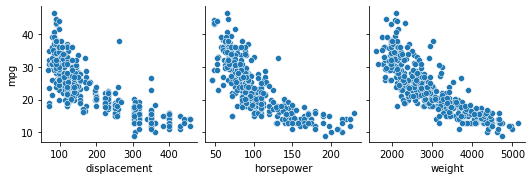

In [ ]:
sns.pairplot(df, y_vars="mpg", x_vars=["displacement", "horsepower", 
                   "weight"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


Y = df[['mpg']]
X = df[['weight','displacement', 'horsepower']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

regressor = Pipeline([('scaler', MinMaxScaler()), 
                      ('poly', PolynomialFeatures(degree=2)),
                      ('linear', LinearRegression())])

regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)


0.7540318300559887

This is slightly better than the linear model.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

0.7305924852307124

https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions